Importing the dependencies

Data collection → Data Preprocessing → Data Analysis → Data visualization → Split into features and labels → Train test split →  Modeling → Evaluation → Predictive system → Web app

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [4]:
house_data = pd.read_csv('housing.csv')

In [5]:
house_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,B,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


crim – per capita crime rate by town

zn – proportion of residential land zoned for large lots

indus – proportion of non-retail business acres per town

chas – Charles River dummy variable (1 if tract bounds river; 0 otherwise)

nox – nitric oxides concentration

rm – average number of rooms per dwelling

age – proportion of owner-occupied units built before 1940

dis – weighted distances to employment centers

rad – index of accessibility to highways

tax – property-tax rate per $10,000

ptratio – pupil-teacher ratio by town

B – proportion of Black residents

lstat – % lower status of the population

price – median value of owner-occupied homes (target variable)

In [7]:
# Statistical insights
house_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,B,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613778,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601440,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  B        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
house_data.shape

(506, 14)

Text(0, 0.5, 'Price in USD 1= 1k USD')

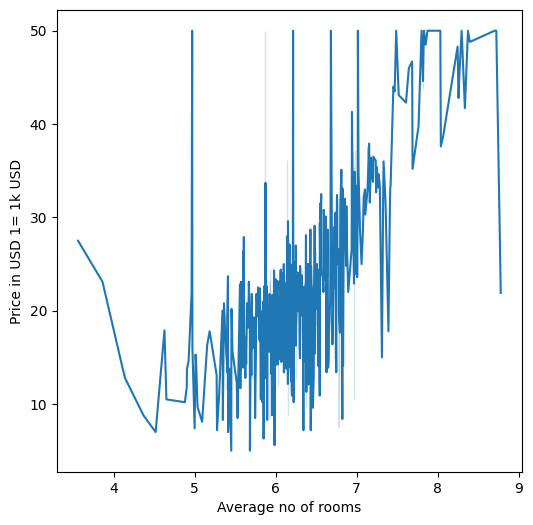

In [16]:
plt.figure(figsize= (6, 6))
sns.lineplot(data= house_data, x= 'rm', y='price')
plt.xlabel("Average no of rooms")
plt.ylabel("Price in USD 1= 1k USD")

<Axes: xlabel='price', ylabel='Count'>

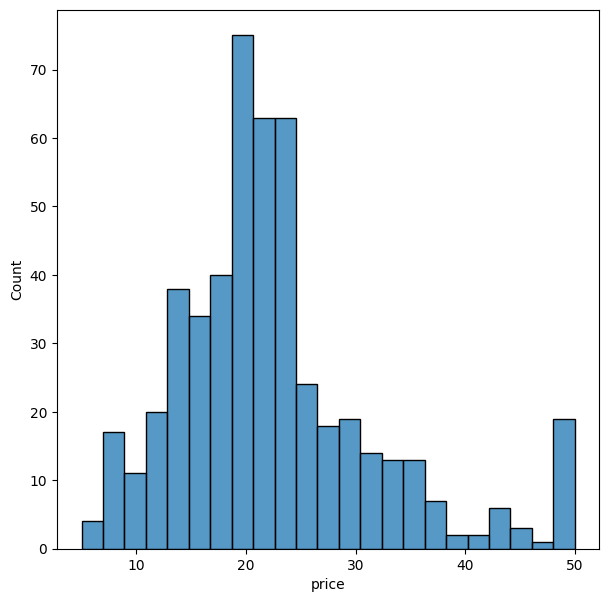

In [17]:
plt.figure(figsize= (7, 7))
sns.histplot(data= house_data, x= 'price')

Text(0.5, 1.0, 'Distribution of Average no of rooms')

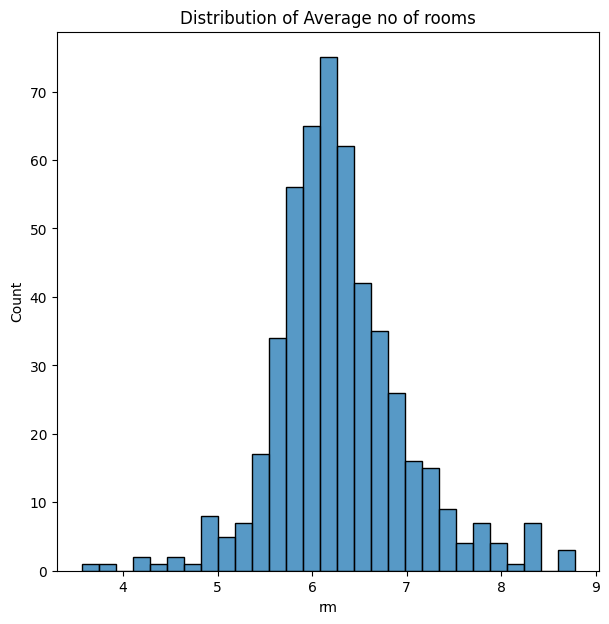

In [19]:
plt.figure(figsize= (7, 7))
sns.histplot(data= house_data, x= 'rm')
plt.title('Distribution of Average no of rooms')

In [20]:
house_data.head(0)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,B,lstat,price


In [22]:
# Splitting features and labels
X = house_data.drop(columns= 'price')
Y = house_data['price']

In [55]:
X.shape

(506, 13)

In [23]:
# Train test split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 42) 

In [56]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [24]:
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [28]:
# Model evaluation using R square on training data
training_prediction = regressor.predict(X_train)
training_r2_score = metrics.r2_score(Y_train, training_prediction)

In [29]:
print(training_r2_score)

0.7508857906433581


In [40]:
# Model evaluation using R square on test data
test_prediction = regressor.predict(X_test)
test_r2_score = metrics.r2_score(Y_test, test_prediction)

In [41]:
print(test_r2_score)

0.6687661037947858


In [51]:
# Predictive system
input = (0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98)
inp_to_arr = np.asarray(input)
reshaped_inp = inp_to_arr.reshape(1, -1)
prediction = regressor.predict(reshaped_inp)
print(f"The price of the house is ${round(prediction[0], 2)}k")

The price of the house is $29.95k


c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Saving the model

In [53]:
house = pickle.dump(regressor, open('HousingModel.sav', 'wb'))

In [54]:
loaded_model = pickle.load(open('HousingModel.sav', 'rb'))